# Netflix Movies and TV Shows Exploratory Analysis

Netflix is one of the most famous streaming services in the world. In this Exploratory Data Analysis project, i will explore movies and shows of netflix through Data preparation and visualization using by different libraries. Also, i will create a database in Jupyter Notebook.

## Download the Data

First, we should download the data from Kaggle

In [1]:
pip install opendatasets --upgrade --quiet

Note: you may need to restart the kernel to use updated packages.


In [2]:
import opendatasets as od

download_url = 'https://www.kaggle.com/shivamb/netflix-shows'

od.download(download_url)

Skipping, found downloaded files in "./netflix-shows" (use force=True to force download)


In [3]:
data_filename = './netflix-shows/netflix_titles.csv'

## Data Preparation and Cleaning

- Load the file using Pandas
- Look at some information about the data & columns
- Fix any missing or incorrect values

In [4]:
import pandas as pd

In [5]:
netflix_df = pd.read_csv(data_filename)

In [6]:
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [7]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [8]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


There are 8807 entries and 12 columns to work with project

In [9]:
netflix_df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [10]:
missing_percentages = netflix_df.isna().sum().sort_values(ascending = False) / len(netflix_df)
missing_percentages

director        0.299080
country         0.094357
cast            0.093675
date_added      0.001135
rating          0.000454
duration        0.000341
description     0.000000
listed_in       0.000000
release_year    0.000000
title           0.000000
type            0.000000
show_id         0.000000
dtype: float64

We see that some columns has null values('director', 'country', 'cast', 'date_added', 'rating', 'duration')

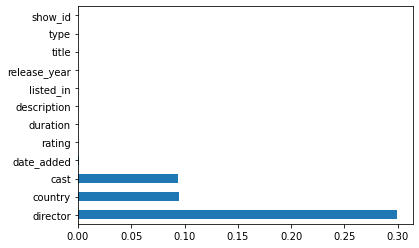

In [11]:
missing_percentages.plot(kind = 'barh');

In [12]:
netflix_df['director'].fillna('No  Director', inplace = True)
netflix_df['cast'].fillna('No Cast', inplace = True)
netflix_df['country'].fillna('Country Unavailable', inplace = True)
netflix_df.dropna(subset = ['date_added', 'rating','duration'], inplace = True)

The easiest way to get rid of the null values would be to delete the rows with the lost data. However, this wouldn't be useful to our project since there is a miss of information. The code cell above shows us that 'director', 'country', 'cast' contain the majority of null values, i've decided to treat each missing values as unavailable. Also, the other columns such as 'date_added', 'rating' and 'duration' contains an insignificant portion of the data so I've dropped them from the dataset.

In [13]:
netflix_df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

As we can see there is no null values anymore

## Exploratory Analysis and Visualization

Columns we'll analyze:

- type
- rating
- title
- country
- date_added
- duration
- listed_in

Installing and importing necessary packages

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib

In [15]:
import warnings

warnings.filterwarnings('ignore')

In [16]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Director,No Cast,Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Splitting  'Movie'  and  'TV Show' from dataset

We know that Netflix contains both movies and tv shows, it will be nice if we split dataset for both. So, I've created 2 new datasets for movies and tv shows.

In [17]:
netflix_movies_df = netflix_df[netflix_df['type'] == 'Movie']
netflix_movies_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Country Unavailable,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [18]:
netflix_shows_df = netflix_df[netflix_df['type'] == 'TV Show']
netflix_shows_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Director,No Cast,Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


### Netflix film types

I've decided to compare the total number of movies and tv shows in order to understand an idea of which one is the majority.

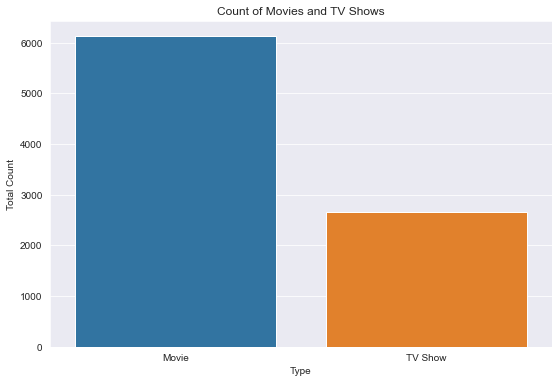

In [19]:
sns.set_style('darkgrid')

plt.figure(figsize = (9,6))
sns.countplot(x = netflix_df.type)
plt.title('Count of Movies and TV Shows')
plt.xlabel('Type')
plt.ylabel('Total Count');

In [20]:
netflix_df.type.value_counts()

Movie      6126
TV Show    2664
Name: type, dtype: int64

As we can see from the plot movies exceed the tv shows. There are roughly 6000+ movies and 2000+ tv shows. Also, for the clarity I've used value_counts() method in order to get exact values for both movies and tv shows.

### Netflix film ratings

We can examine the ratings which are based on the film rating system.

In [21]:
netflix_df.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

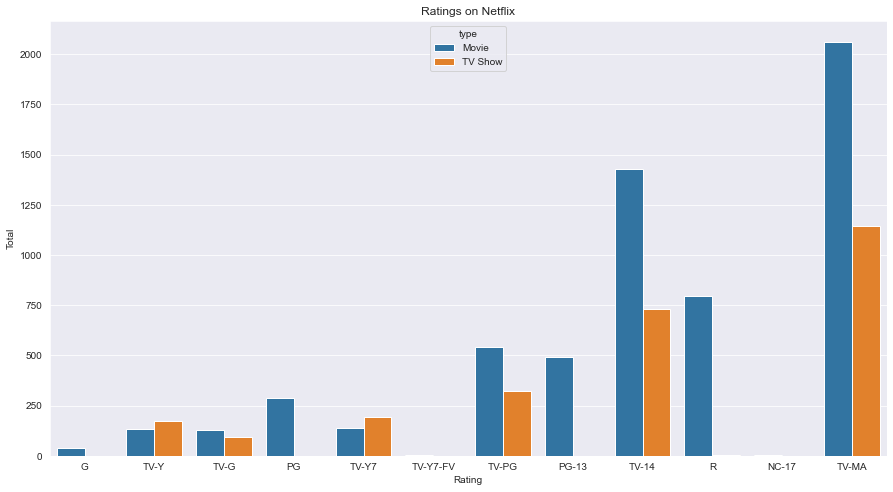

In [22]:
ratings = ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
plt.figure(figsize=(15,8))
sns.countplot(x = netflix_df.rating, hue = netflix_df.type, order = ratings)
plt.title('Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Total');

### Netflix film duration

I took a look at duartion column, there appeared to be a discrepancy between movies and shows. Movies are based on duration of movie(120 min) and shows based on number of seasons(2 seasons). I converted these values into integers for both movies and tv shows. It became easier to work with EDA.

In [23]:
netflix_movies_df.duration = netflix_movies_df.duration.str.replace(' min','').astype(int)
netflix_shows_df.rename(columns={'duration':'seasons'}, inplace=True)
netflix_shows_df.replace({'seasons':{'1 Season':'1 Seasons'}}, inplace=True)
netflix_shows_df.seasons = netflix_shows_df.seasons.str.replace(' Seasons','').astype(int)

In [24]:
import numpy as np

In [25]:
netflix_movies_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Country Unavailable,"September 24, 2021",2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127,"Dramas, International Movies",After most of her family is murdered in a terr...


In [26]:
netflix_shows_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,seasons,listed_in,description
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Country Unavailable,"September 24, 2021",2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Director,No Cast,Country Unavailable,"September 24, 2021",2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Country Unavailable,"September 24, 2021",2021,TV-MA,1,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


As you can see that duration of movie and seasons weighted in number as well

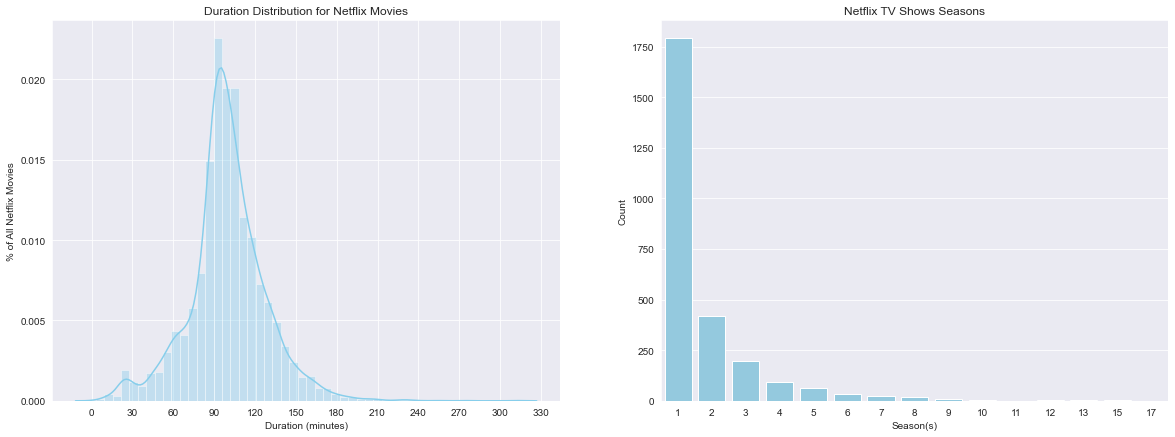

In [27]:
fig, axes = plt.subplots(1,2, figsize=(20, 7))
p1 = sns.distplot(x = netflix_movies_df.duration, color='skyblue',ax=axes[0]);
p1.set_xticks(np.arange(0,360,30))
p1.set_title("Duration Distribution for Netflix Movies")
p1.set_ylabel("% of All Netflix Movies")
p1.set_xlabel("Duration (minutes)")
p2 = sns.countplot(x = netflix_shows_df.seasons, color='skyblue',ax=axes[1]);
p2.set_title("Netflix TV Shows Seasons")
p2.set_ylabel("Count")
p2.set_xlabel("Season(s)");

I've decided to plot 2 different graphs, the first graph closely similar to a normal distribution with the average viewing time spanning about 90 minutes. The second one show us quantity of tv shows for each season. So, second plot tell us that 1 season have the majority of shows.  

### Working with dates

The data type of  'netflix_df.date_added'  is object, so Pandas does not know that this column is a date.
We can convert it into a datetime column using the pd.to_datetime method.

In [28]:
netflix_df['date_added'] = pd.to_datetime(netflix_df.date_added)
netflix_movies_df['date_added'] = pd.to_datetime(netflix_movies_df.date_added)
netflix_shows_df['date_added'] = pd.to_datetime(netflix_shows_df.date_added)

We can see that it now has the datatype datetime64, we can now extract different parts of the data into separate columns, using the DatetimeIndex method.

### Content added each year

In [29]:
netflix_df['year_added'] = pd.DatetimeIndex(netflix_df.date_added).year
netflix_movies_df['date_added'] = pd.DatetimeIndex(netflix_movies_df.date_added).year
netflix_shows_df['date_added'] = pd.DatetimeIndex(netflix_shows_df.date_added).year

Now we can take a look at the amount of content netflix has added throughout the years. I've added a 'year_added' column, because we are interested in when netflix added the content into their platform.

In [30]:
netflix_year_added = netflix_df['year_added'].value_counts().reset_index().rename(columns = {'index' : 'year', 'year_added' : 'count'})
netflix_year_added

,year,count
0,2019,2016
1,2020,1879
2,2018,1648
3,2021,1498
4,2017,1185
5,2016,426
6,2015,82
7,2014,24
8,2011,13
9,2013,11


The code above show us overall added content for each year.
The heatmap below is just an implementation of code that I've mentioned earlier.

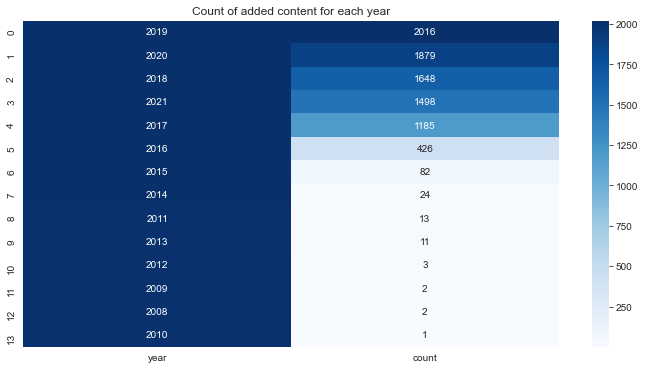

In [31]:
plt.figure(figsize = (12,6))
plt.title("Count of added content for each year")
sns.heatmap(netflix_year_added, fmt="d", annot=True, cmap='Blues');

Also we can see overall added content for a specific type of film such as movies and tv shows

In [32]:
netflix_year_type = netflix_df[['type','year_added']]
netflix_year_type

,type,year_added
0,Movie,2021
1,TV Show,2021
2,TV Show,2021
3,TV Show,2021
4,TV Show,2021
...,...,...
8802,Movie,2019
8803,TV Show,2019
8804,Movie,2019
8805,Movie,2020


In [73]:
movie_year = netflix_year_type[netflix_year_type['type'] == 'Movie'].year_added.value_counts().reset_index().rename(columns = {'index' : 'year','year_added':'count'})
show_year = netflix_year_type[netflix_year_type['type'] == 'TV Show'].year_added.value_counts().reset_index().rename(columns = {'index' : 'year', 'year_added' : 'count'})

In [74]:
movie_year

,year,count
0,2019,1424
1,2020,1284
2,2018,1237
3,2021,993
4,2017,836
5,2016,251
6,2015,56
7,2014,19
8,2011,13
9,2013,6


In [75]:
show_year

,year,count
0,2020,595
1,2019,592
2,2021,505
3,2018,411
4,2017,349
5,2016,175
6,2015,26
7,2013,5
8,2014,5
9,2008,1


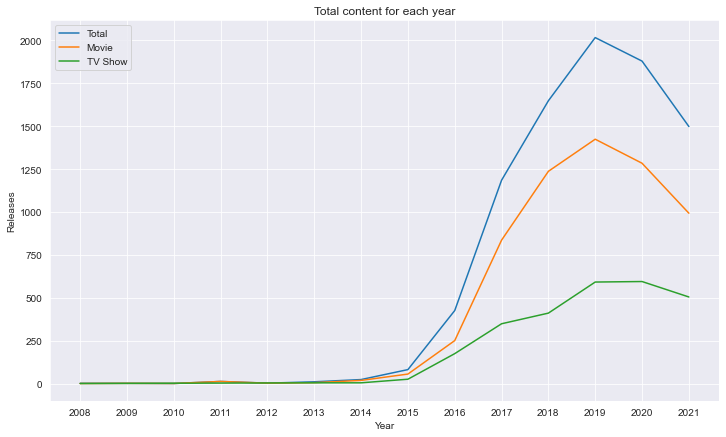

In [94]:
fig, axes = plt.subplots(figsize = (12,7))
sns.lineplot(data = netflix_year_added, x = 'year', y = 'count')
sns.lineplot(data = movie_year, x = 'year', y = 'count')
sns.lineplot(data = show_year, x = 'year', y = 'count')
axes.set_xticks(np.arange(2008, 2022, 1))
plt.title('Total content for each year')
plt.legend(['Total', 'Movie', 'TV Show'])
plt.xlabel('Year')
plt.ylabel('Releases');

As we can see from the lineplot above all contents since 2008 to 2014 differ insignificant, but trend suddenly broken in 2015 and rised gradually till 2019 and decreased slowly till 2021.

### Top 10 countries with the most content available

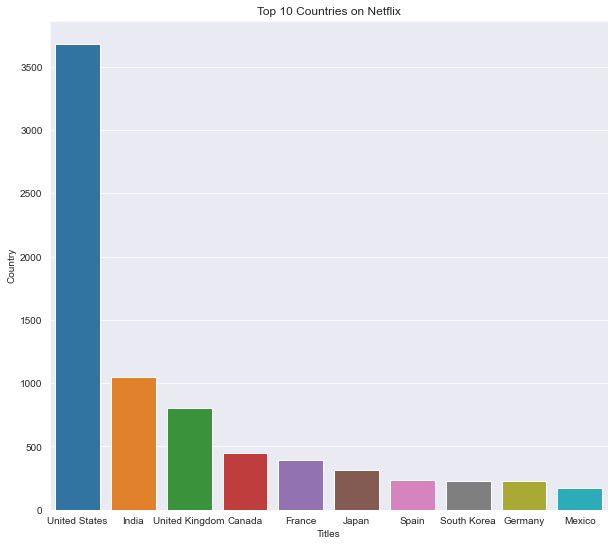

In [119]:
countries_filter = netflix_df.set_index('title').country.str.split(', ', expand = True).stack().reset_index(level=1, drop=True)
countries_filter = countries_filter[countries_filter != 'Country Unavailable']

plt.figure(figsize = (10,9))
sns.countplot(x = countries_filter, order = countries_filter.value_counts().index[:10])
plt.title('Top 10 Countries on Netflix')
plt.xlabel('Titles')
plt.ylabel('Country');


Now we can examine the countries with the most content on Netflix. Movies and tv shows are available in multiple countries. Hence, we need to separate all countries within a film before analyzing. After we can plot a top 10 list to see which countries have the highest availability of films on Netflix.

### Popular Genres

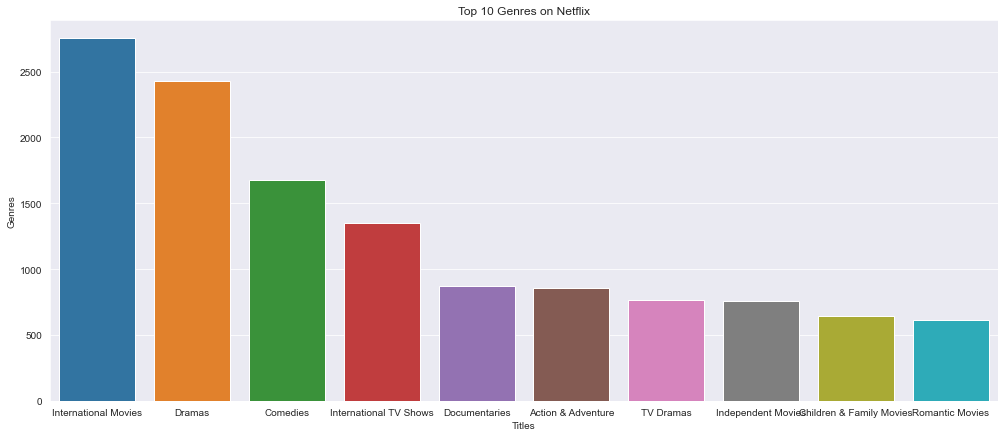

In [126]:
genres_filter = netflix_df.set_index('title').listed_in.str.split(', ', expand = True).stack().reset_index(level = 1, drop = True)

plt.figure(figsize = (17,7))
sns.countplot(x = genres_filter, order = genres_filter.value_counts().index[:10])
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres');

We can do the same actions with the genres. After we can plot top 10 list to see which genres the most popular on netflix.

# DataBase Connection

Working with Databases is one of the main aspects of Data Science especially in Data Analysis.
I've decided to connect my project with MySQL server.

- Installing and importing necessary packages
- Creating database on jupyter notebook using by mysql.connector library
- Connection with database
- Creating a table on jupyter
- Importing all CSV data into database(python script)

In [178]:
netflix_db_df = pd.read_csv('./netflix-shows/netflix_titles.csv')

In [172]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In order to create a database we should connect with MySQl server. We just need hostname, username and password. So, I've created Netflix_EDA_DB database using by mysql.connector library. 
This library allows to create DB on Python

In [173]:
import mysql.connector
import csv

In [175]:
import mysql.connector as msql
from mysql.connector import Error
try:
    conn = msql.connect(host='localhost', user='root',  
                        password='QweAsdZxc123!')
    if conn.is_connected():
        cursor = conn.cursor()
        cursor.execute("CREATE DATABASE Netflix_EDA_DB")
        print("Database is created")
except Error as e:
    print("Error while connecting to MySQL", e)

Database is created


### Sending CSV data to DataBase

Now we can create a table in our database. Firstly, we should name our table and add columns according to dataset. Secondly, we should import all CSV data to our table.

In [200]:
import mysql.connector as msql
from mysql.connector import Error
try:
    conn = mysql.connector.connect(host='localhost', database='Netflix_EDA_DB', user='root', password='QweAsdZxc123!')
    if conn.is_connected():
        cursor = conn.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)
        cursor.execute('DROP TABLE IF EXISTS netflix_db_df;')
        print('Creating table....')
        cursor.execute("CREATE TABLE netflix_db_df(show_id varchar(50), type varchar(20), title varchar(1000), director varchar(1000), cast varchar(1000), country varchar(1000), date_added varchar(30), release_year int, rating varchar(20), duration varchar(30), listed_in varchar(100), description varchar(1000))")
        print("Table is created....")
        
        netflix_db_df = netflix_db_df.where((pd.notnull(netflix_db_df)), None)
        for i,row in netflix_db_df .iterrows():
             
            sql = "INSERT INTO Netflix_EDA_DB.netflix_db_df VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)"
            cursor.execute(sql, tuple(row))
            
            conn.commit()
except Error as e:
            print("Error while connecting to MySQL", e)

You're connected to database:  ('netflix_eda_db',)
Creating table....
Table is created....


## Summary and Conclusion

I am an active user of netflix and I do like it.The major reason is that netflix has numerous kind of films. Also, it's convenient for users. That's why I've choosen dataset with related to netflix. So in this EDA project we've covered all aspects of Data analysis starting from data preparation and cleaning using pandas followed by vizualization using matplotlib and seaborn. In the end, we've connected to MySQL server and imported data into created table.